In [2]:
import sca as sca
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
def simu_tseries(n_time,n_roi,n_clusters,alpha) :
    y = np.random.normal(size=[n_roi , n_time])
    gt = np.zeros(shape=[n_roi,n_clusters.size])
    
    for ss in range(0,n_clusters.size) :
        ind = np.linspace(0,n_roi,n_clusters[ss]+1,dtype="int")
        for cc in range(0, n_clusters[ss]) :
            cluster = range(ind[cc],ind[cc+1])
            sig = np.random.normal(size=[1,n_time])
            y[cluster,:] = y[cluster,:] + alpha * np.repeat(sig,ind[cc+1]-ind[cc],0)
            gt[cluster,ss] = cc
    return y , gt

In [4]:
n_time = 100     # number of time samples
n_roi = 150      # number of regions
n_clusters = np.array([5])   # number  of clusters 
alpha = 0.5    # this parameter controls the "strength" of the clustering.
y , gt = simu_tseries(n_time , n_roi , n_clusters , alpha )

In [9]:
stab_maps = sca.recursive_cluster(y, n_clusters=5, n_states=5, subsample_size=20)

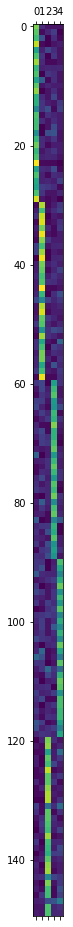

In [10]:
plt.matshow(stab_maps)